# `LinPath` Path Objects

`LinPath` objects are used for creating paths formed by straight and curved lines.

They have `pos` and `angle` properties that define the current position and orientation angle respectively. Their default position is the origin and their default angle is 90 degrees (facing upward).

Their initial position can be specified in the constructor. 



In [25]:
import simetri.graphics as sg

pi = sg.pi
path = sg.LinPath()
print(f"path.pos: {path.pos}")
print(f"path.angle: {sg.degrees(path.angle)} degrees\n")

path2 = sg.LinPath((50, 70))
path2.angle = pi/3
print(f"path2.pos: {path.pos}")
print(f"path2.angle: {sg.degrees(path.angle)} degrees")

path.pos: (0, 0)
path.angle: 90.0 degrees

path2.pos: (0, 0)
path2.angle: 90.0 degrees


### `path.forward(dist)`

`path.forward` draws a line in the same orientatin as the path.angle with given length.

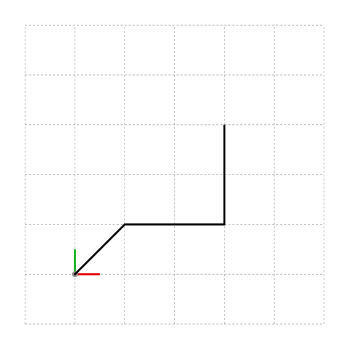

In [4]:
import simetri.graphics as sg

canvas = sg.Canvas()

canvas.help_lines(pos=(-50, -50), width=300, height=300, spacing=50)

path = sg.LinPath()
path.angle = pi/4
path.forward(70.71)
path.angle = 0
path.forward(100)
path.angle = pi/2
path.forward(100)

canvas.draw(path, line_width=2)

canvas.display()


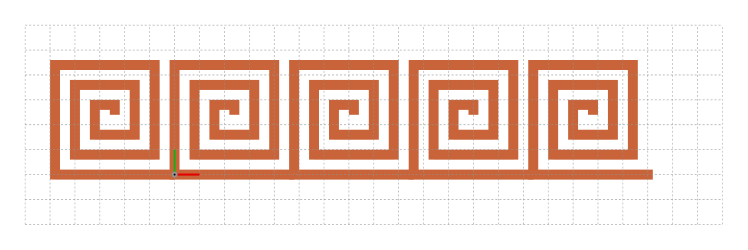

In [5]:
import simetri.graphics as sg

canvas = sg.Canvas()


path = sg.LinPath()
path.angle = sg.pi
d = 120
for i in range(12):
    path.forward(d)
    d -= 10
    path.angle -= sg.pi/2

paths = path.translate(120, 0, reps=4)
canvas.draw(paths, line_width=10, line_color=sg.terra_cotta)
canvas.help_lines(pos=(-150, -50), width=700, height=200, spacing=25)
canvas.display()

### `path.line_to(point)`

Draws a line between the path's current position and the given point. Path object's orientation angle changes to the orientation angle of the specified line, and its position changes to the given point.

path.pos: (120, 60)
path.angle: 26.57 degrees


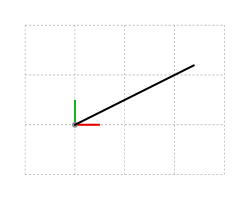

In [6]:
import simetri.graphics as sg

canvas = sg.Canvas()

canvas.help_lines(pos=(-50, -50), width=200, height=150, spacing=50)

path = sg.LinPath()
path.line_to((120, 60))
print(f"path.pos: {path.pos}")
print(f"path.angle: {sg.degrees(path.angle):.2f} degrees")

canvas.draw(path, line_width=2)

canvas.display()

### `path.h_line(dist)`, `path.v_line(dist)` and `path.close()`

`path.h_line` draws a horizontal line with the given distance. If the `dist` argument is negative then line is drawn in `-x` direction.

`path.v_line` draws a vertical line with the given distance. If the `dist` argument is negative then line is drawn in `-y` direction.

`path.close()` closes the path.


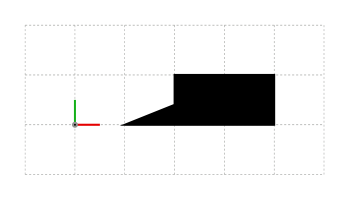

In [7]:
import simetri.graphics as sg

canvas = sg.Canvas()

canvas.help_lines(pos=(-50, -50), width=300, height=150, spacing=50)

path = sg.LinPath((50, 0))
path.h_line(150)
path.v_line(50)
path.h_line(-100)
path.v_line(-30)
path.close()

canvas.draw(path, line_width=2)

canvas.display()

### `path.arc(radius_x, radius_y, start_angle, span_angle, rot_angle)`

`path.arc` draws and elliptic arc with the given parameters.

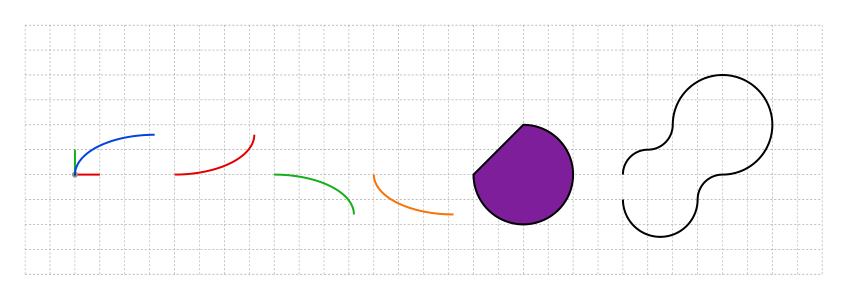

In [8]:
import simetri.graphics as sg
pi = sg.pi

canvas = sg.Canvas()

canvas.help_lines(pos=(-50, -100), width=800, height=250, spacing=25)
path = sg.LinPath()

path.arc(80, 40, pi, -pi/2)
canvas.draw(path, line_width=2, line_color=sg.blue)

path2 = sg.LinPath((100, 0))
path2.arc(80, 40, -pi/2, pi/2)
canvas.draw(path2, line_width=2, line_color=sg.red)

path3 = sg.LinPath((200, 0))
path3.arc(80, 40, pi/2, -pi/2)
canvas.draw(path3, line_width=2, line_color=sg.green)

path4 = sg.LinPath((300, 0))
path4.arc(80, 40, pi, pi/2)
canvas.draw(path4, line_width=2, line_color=sg.orange)

path5 = sg.LinPath((400, 0))
path5.arc(50, 50, pi, 3 * pi/2)
path5.close()
canvas.draw(path5, line_width=2, fill_color=sg.purple)

path6 = sg.LinPath((550, 0))
path6.arc(25, 25, pi, -pi/2)
path6.arc(25, 25, -pi/2, pi/2)
path6.arc(50, 50, pi, -3 * pi/2)
path6.arc(25, 25, pi/2, pi/2)
path6.arc(37.5, 37.5, 0, -pi)

canvas.draw(path6, line_width=2)

canvas.display()

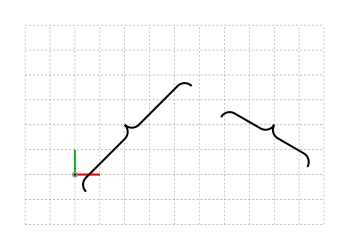

In [9]:
import simetri.graphics as sg

canvas = sg.Canvas()

def curly_brace(pos, angle, length=100, radius=10):
    x, y = pos[:2]
    x1 = length /2
    y1 = 2 * radius
    half = sg.LinPath()
    half.arc(radius_x=radius, radius_y=radius, start_angle=sg.pi, span_angle=-sg.pi/2)
    half.forward(x1 - y1)
    half.arc(radius_x=radius, radius_y=radius, start_angle=3*sg.pi/2, span_angle=sg.pi/2)
    brace = half.mirror(half.right, reps=1)

    brace.rotate(angle, (x1, y1))
    x2 = x - (length / 2)
    y2 = y - (2*radius)
    brace.translate(x2, y2)

    return brace

canvas.help_lines(pos=(-50, -50), width=300, height=200, spacing=25)
brace = curly_brace((50, 50), sg.pi/4, length=150)
brace2 = curly_brace((200, 50), -sg.pi/6, length=100)

canvas.draw([brace, brace2], line_width=2)
canvas.display()

### `path.cubic_to(control1, control2, end)`

`path.cubic_to` draws a cubic Bezier curve using the path's position, given control points, and the end point. Path objects can be transformed like any other Shape object.



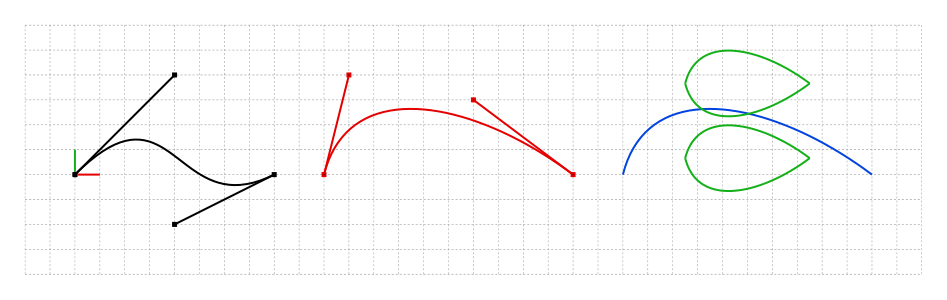

In [10]:
import simetri.graphics as sg

canvas = sg.Canvas()

canvas.help_lines(pos=(-50, -100), width=900, height=250, spacing=25)

path = sg.LinPath()
path.cubic_to((100, 100), (100, -50), (200, 0))
canvas.draw(path, line_width=2, handles=True)

path2 = sg.LinPath((250, 0))
path2.cubic_to((275, 100), (400, 75), (500, 0))
canvas.draw(path2, line_width=2, handles=True, line_color=sg.red)

path3 = sg.LinPath((550, 0))
path3.cubic_to((575, 100), (700, 75), (800, 0))
canvas.draw(path3, line_width=2, line_color=sg.blue)

shape = path3.mirror(sg.axis_x, reps=1).scale(.5, about=path3.center)
shape.translate(0, 75, reps=1)
canvas.draw(shape, line_width=2, line_color=sg.green)


canvas.display()

### `path.quad_to(control, end)`

`path.quad_to` draws a quadratic Bezier curve using the path's position, given control point, and the end point. 

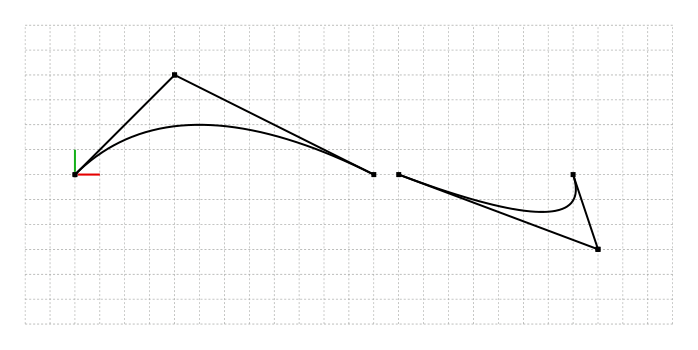

In [11]:
import simetri.graphics as sg

canvas = sg.Canvas()

canvas.help_lines(pos=(-50, -150), width=650, height=300, spacing=25)

path = sg.LinPath()
path.quad_to((100, 100), (300, 0))
canvas.draw(path, line_width=2, handles=True)

path = sg.LinPath((325, 0))
path.quad_to((525, -75), (500, 0))
canvas.draw(path, line_width=2, handles=True)


canvas.display()

### `path.hobby_to(points)`

Draws a Hobby curve through the given points. 

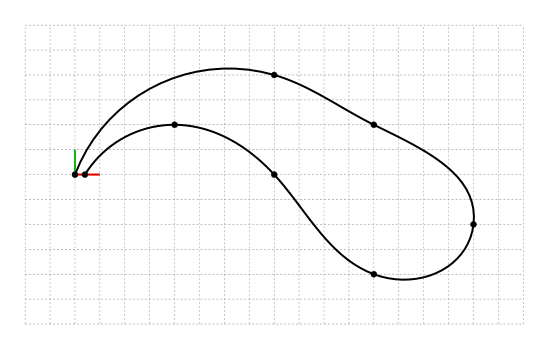

In [12]:
import simetri.graphics as sg

canvas = sg.Canvas()

canvas.help_lines(pos=(-50, -150), width=500, height=300, spacing=25)

path = sg.LinPath()

points = [(0, 0), (200, 100), (300, 50), (400, -50), (300, -100),
                (200, 0), (100, 50), (10, 0)]
path.hobby_to(points)
for p in points:
    canvas.circle(p, 3)

canvas.draw(path, line_width=2, handles=True)
canvas.display()

### `path.sine_to(period, amplitude, duration, phase_angle, damping)`

`path.sine_to` draws a sine-wave using the given arguments. In the next version, we will have more controls for this operation.

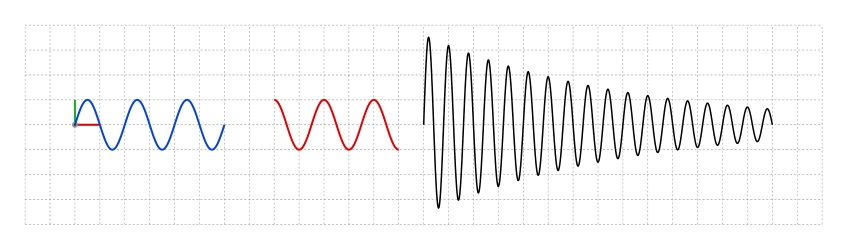

In [13]:
import simetri.graphics as sg

canvas = sg.Canvas()

canvas.help_lines(pos=(-50, -100), width=800, height=200, spacing=25)

path = sg.LinPath()
path.sine(period=50, amplitude=25, duration=150)
canvas.draw(path, line_width=2, line_color=sg.blue)

path2 = sg.LinPath((200, 0))
path2.sine(period=50, amplitude=25, duration=125, phase_angle=sg.pi/2)
canvas.draw(path2, line_width=2, line_color=sg.red)

path3 = sg.LinPath((350, 0))
path3.sine(period=20, amplitude=90, duration=350, damping=.005)
canvas.draw(path3, line_width=1.5)

canvas.display()

### `path.move_to(point)`

`path.move_to` changes the path's position without drawing a line.

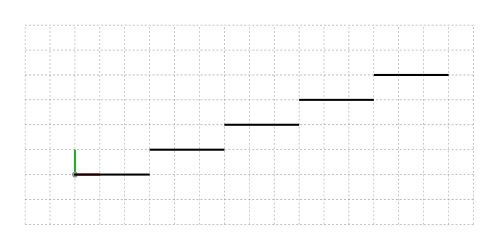

In [14]:
import simetri.graphics as sg

canvas = sg.Canvas()

canvas.help_lines(pos=(-50, -50), width=450, height=200, spacing=25)

path = sg.LinPath()
for i in range(5):
    path.h_line(75)
    c = (i + 1)
    path.move_to((c*75, c*25))


canvas.draw(path, line_width=2)
canvas.display()

## Relative motions

For some path operations, we can specify the coordinates relative to the current path position. 

New position is computed by adding dx to the path's x coordinate and dy to the path's y coordinate. Path's angle is ignored.

### `path.r_line(dx, dy)` and `path.r_move(dx, dy)`

`path.r_line` draws a line between the path's position and (dx, dy) offset from this position.
`path.r_move` moves the path by the given offset values without drawing a line.

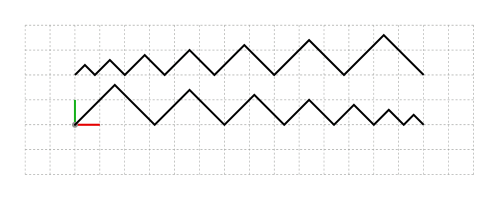

In [15]:
import simetri.graphics as sg

canvas = sg.Canvas()

canvas.help_lines(pos=(-50, -50), width=450, height=150, spacing=25)

path = sg.LinPath()
for i in range(7):
    x = 40 - i * 5
    y = 40 - i * 5
    path.r_line(x, y)
    path.r_line(x, -y)

path.r_move(0, 50)

for i in range(7):
    x = 40 - i * 5
    y = 40 - i * 5
    path.r_line(-x, y)
    path.r_line(-x, -y)


canvas.draw(path, line_width=2)
canvas.display()

## Blended operations.

These operations blend the drawn lines to the path by using paths orientation angle.

### `path.blend_arc(radius_x, radius_y, start_angle, span_angle, sharp=False)`

Blends an arc to the path. If the `sharp` argument is True then blending is reversed by 180 degree.


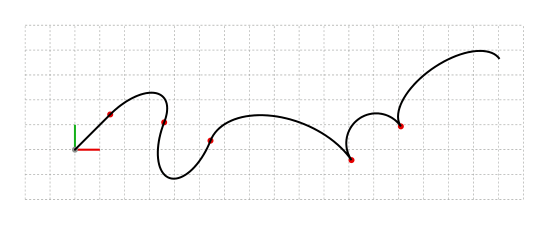

In [16]:
import simetri.graphics as sg

pi = sg.pi

canvas = sg.Canvas()

canvas.help_lines(pos=(-50, -50), width=500, height=175, spacing=25)

path = sg.LinPath()
path.angle = pi/4

path.forward(50)
canvas.circle(path.pos, 3, fill_color=sg.red, stroke=False)

path.blend_arc(radius_x=50, radius_y=25, start_angle=pi/2, span_angle=-2*pi/3)
canvas.circle(path.pos, 3, fill_color=sg.red, stroke=False)

path.blend_arc(radius_x=50, radius_y=25, start_angle=pi/2, span_angle=pi)
canvas.circle(path.pos, 3, fill_color=sg.red, stroke=False)

path.blend_arc(radius_x=80, radius_y=50, start_angle=0, span_angle=-5*pi/6)
canvas.circle(path.pos, 3, fill_color=sg.red, stroke=False)

path.blend_arc(radius_x=30, radius_y=30, start_angle=0, span_angle=-pi, sharp=True)
canvas.circle(path.pos, 3, fill_color=sg.red, stroke=False)

path.blend_arc(radius_x=60, radius_y=30, start_angle=0, span_angle=-pi, sharp=True)

canvas.draw(path, line_width=2)
canvas.display()

### `path.blend_cubic(control1_length, control2, end)` 
### and
### `path.blend_quad(control_length, end)`

Blends a Bezier curve to the path. 

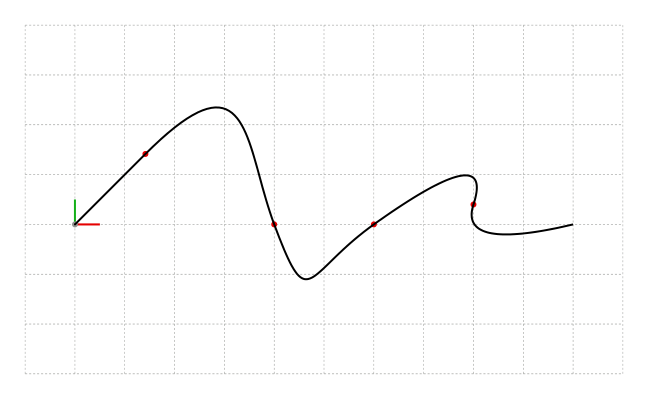

In [17]:
import simetri.graphics as sg

pi = sg.pi

canvas = sg.Canvas()

canvas.help_lines(pos=(-50, -150), width=600, height=350, spacing=50)

path = sg.LinPath()
path.angle = pi/4

path.forward(100)
canvas.circle(path.pos, 3, fill_color=sg.red, stroke=False)

path.blend_cubic(150, (170, 80), (200, 0))
canvas.circle(path.pos, 3, fill_color=sg.red, stroke=False)

path.blend_cubic(100, (230, -50), (300, 0))
canvas.circle(path.pos, 3, fill_color=sg.red, stroke=False)

path.blend_quad(150, (400, 20))
canvas.circle(path.pos, 3, fill_color=sg.red, stroke=False)
path.blend_quad(50, (500, 0))

canvas.draw(path, line_width=2)
canvas.display()

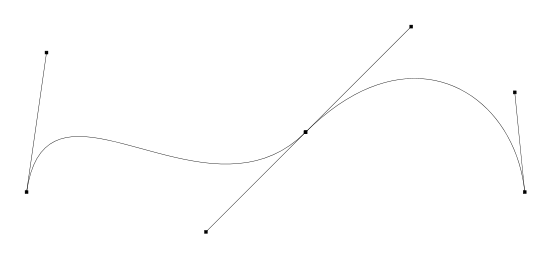

In [18]:
import simetri.graphics as sg

canvas = sg.Canvas()

path = sg.LinPath()
path.cubic_to(control1=(20, 140), control2=(180, -40), end=(280, 60))
path.blend_cubic(control1_length=150, control2=(490, 100), end=(500, 0))

canvas.draw(path, handles=True)
canvas.display()

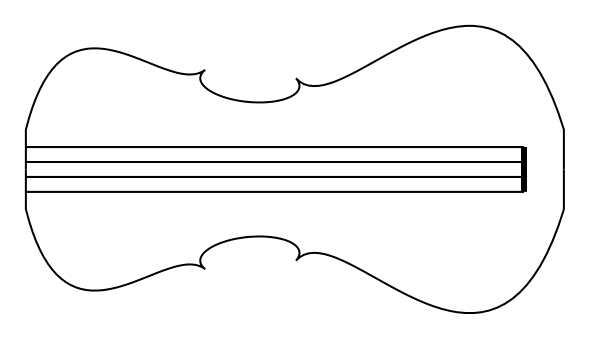

In [19]:
import simetri.graphics as sg

canvas = sg.Canvas()

path = sg.LinPath((0, -40))
path.forward(40)
path.cubic_to(control1=(40, 160), control2=(140, 30), end=(180, 60))
path.blend_arc(radius_x=50, radius_y=20, start_angle=sg.radians(170), span_angle=sg.radians(200), sharp=True)
path.blend_cubic(control1_length=-70, control2=(470, 230), end=(540, 0))
path.v_line(-40)

paths = path.mirror(path.bottom, reps=1)

canvas.draw(paths, line_width=2, line_join=sg.LineJoin.BEVEL)

strings = sg.Shape([(0, -17.5), (500, -17.5)]).translate(0, -15, reps=3)
canvas.draw(strings, line_width=2)
canvas.line((500, -17.5), (500, -62.5), line_width=6)
canvas.display()

### `path.blend_sine(period, amplitude, duration, phase_angle, damping)`

Blends a sine wave to the path.

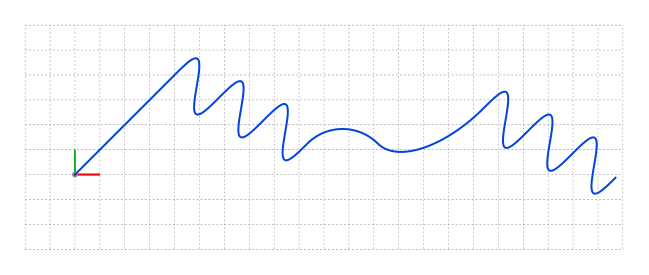

In [20]:
import simetri.graphics as sg

canvas = sg.Canvas()

canvas.help_lines(pos=(-50, -75), width=600, height=225, spacing=25)

path = sg.LinPath()
path.line_to((100, 100))
path.blend_sine(period=50, amplitude=25, duration=150)
path.blend_arc(radius_x=50, radius_y=50, start_angle=0, span_angle=-pi/2)
path.blend_arc(radius_x=100, radius_y=50, start_angle=0, span_angle=pi/2)
path.blend_sine(period=50, amplitude=25, duration=150)

canvas.draw(path, line_width=2, line_color=sg.blue)
canvas.display()

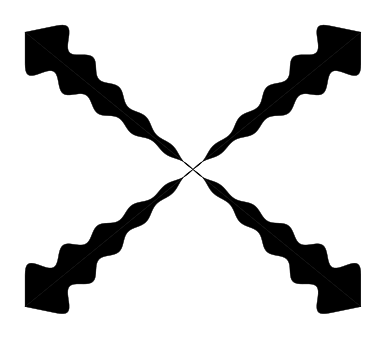

In [21]:
import simetri.graphics as sg

canvas = sg.Canvas()

path = sg.LinPath()
path.forward(30)

path.blend_sine(amplitude=10, duration=200, damping=.01)
path.close()

paths = path.mirror([(0, 0), path.vertices[-2]], reps=1)
paths.mirror(paths.right, reps=1)
paths.mirror(paths.top, reps=1)

canvas.draw(paths)

canvas.display()

### 

### Path utility functions

Path objects provides a number of utility functions to help with drawing and manipulating paths. 
These include: `path.push`, `path.pop`, `path.r_coord`, and `path.r_polar`.

- `path.r_coord(dx, dy)`: Returns a position by offsetting the path's current position by `dx` and `dy` along the aligned axes to the path's angle (visualize a coordinate system with the origin at the path's position and the positive y-axis is aligned with the path's angle.
- `path.r_polar(r, theta)`: Returns a position by offsetting path's current position by `r * cos(theta)` and `r * sin(theta)` from the polar coordinate system with the origin at the path's position and the zero degree line oriented 90 degrees clockwise from the path's orientation angle. 

> [!NOTE]  
> Unlike the `path.r_line` and `path.r_move` operations, `path.r_coord` and `path.r_polar` is computed by using the `path.angle`. 

Path objects have a LIFO stack (last in first out) that holds (position, angle) tuples.

- `path.push`: Pushes the path's position and angle to path's stack.
- `path.pop`: Pops the position and angle values from the stack and applies them to the path object. 

<div class="alert alert-bloc alert-info"> 
<b>Note:</b>  Unlike the <b>`path.r_line`</b> and <b>`path.r_move`</b> operations, <b>`path.r_coord`</b> and <b>`path.r_polar`</b> is computed by using the <b>`path.angle`</b>. 
</div>

path.pos: (0, 0)
path.r_coord(20, -30): (120.71067811865476, 50.0)


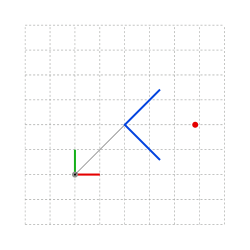

In [22]:
import simetri.graphics as sg

canvas = sg.Canvas()
canvas.help_lines(pos=(-50, -50), width=200, height=200, spacing=25)

path = sg.LinPath()
print(f"path.pos: {path.pos}")
path.line_to((50, 50))
print(f"path.r_coord(20, -30): {path.r_coord(50, 50)}")
canvas.circle(path.r_coord(50, 50), 3, fill_color=sg.red, stroke=False)

path2 = sg.LinPath(path.pos)
path2.angle = path.angle
path2.push()

path2.forward(50)
path2.pop()
path2.angle -= pi/2
path2.forward(50)

canvas.draw(path)
canvas.draw(path2, line_width=2, line_color=sg.blue)

canvas.display()

path1.pos at first segment: (20.0, 0.0)
path1.angle: 0.0 degrees
x, y = path.r_coord(50, 50)
x: 70.0, y: -50.0
_____________________________________________
path2.pos at first segment: (0.0, 20.0)
path2.angle: 90.0 degrees
x, y = path.r_coord(50, 50)
x: 50.0, y: 70.0
_____________________________________________
path3.pos at first segment: (-20.0, 0.0)
path3.angle: 180.0 degrees
x, y = path.r_coord(50, 50)
x: -70.0, y: 50.0
_____________________________________________
path4.pos at first segment: (-0.0, -20.0)
path4.angle: -90.0 degrees
x, y = path.r_coord(50, 50)
x: -50.0, y: -70.0
_____________________________________________


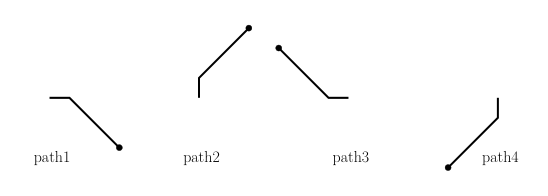

In [23]:
import simetri.graphics as sg

canvas = sg.Canvas()

for i in range(4):
    path = sg.LinPath()
    path.angle = sg.radians(i * 90)
    path.forward(20)
    x, y = path.r_coord(50, 50) # y-axis is aligned with the path.angle
    canvas.circle((x, y), 3)
    print(f"path{i+1}.pos at first segment: {sg.round_point(path.pos)}")
    print(f"path{i+1}.angle: {sg.degrees(path.angle):.1f} degrees")
    print("x, y = path.r_coord(50, 50)")
    print(f"x: {x:.1f}, y: {y:.1f}")
    print('_' * 45)
    path.line_to((x, y))
    canvas.draw(path, line_width=2)
    canvas.text(f"path{i+1}", (0, -60), font_size=16)
    canvas.translate(150, 0)

canvas.display()

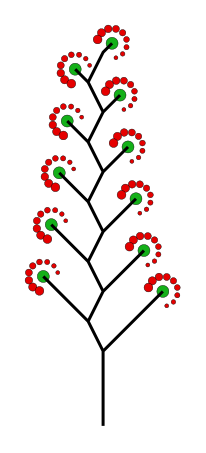

In [24]:
from math import copysign

import simetri.graphics as sg

def flower(radius, canvas, path):
    canvas.circle(path.pos, 6, fill_color=sg.green)
    angle = sg.pi/6
    for i in range(9):
        x, y = path.r_polar(radius, (i*angle) - angle)[:2]
        canvas.circle((x, y), 2+i*.3, fill_color=sg.red)

canvas = sg.Canvas()
dim = 15
path = sg.LinPath()
path.forward(5 * dim)
path.push()
path.r_line(4 * dim, 4 * dim)
flower(dim, canvas, path)
dist = 3 * dim
for i in range(10):
    path.pop()
    sign = copysign(1, i%2 - 0.5) # -1 if i%2 else 1
    path.r_line(dim * sign , 2 * dim)
    path.push()
    delta = 4 * i
    path.r_line(sign * (dist - delta), dist - delta)
    flower(dim, canvas, path)

canvas.draw(path, line_width=3)
canvas.display()